# Intensität in Bildebene

Quelle: https://www2.ph.ed.ac.uk/~wjh/teaching/mo/slides/lens/lens.pdf

In [60]:
import numpy as np
from matplotlib import pyplot as pp
from scipy.special import j1, sinc, fresnel
from ipywidgets import interact, FloatSlider
import matplotlib.cm as cm

## Parameter

In [61]:
# Radius der Linse in xy-Ebene
r = 4

# Begrenzung der x und y Range
h = 5 


# Wellenlänge Licht 700nm (rot)
lmbda = 50*10**-6

# Genauigkeit
N = 2**5

# Brennweite der Linse
f = 10 

# Brechungsindex der Linse 
n = 4/3 

k = 2 * np.pi / lmbda

z0 = 5  
z1 = 5

# Konstante Amplitude A0
A0 = 1 

# Konstante nDelta
nDelta = 5


# Erstes Szenario

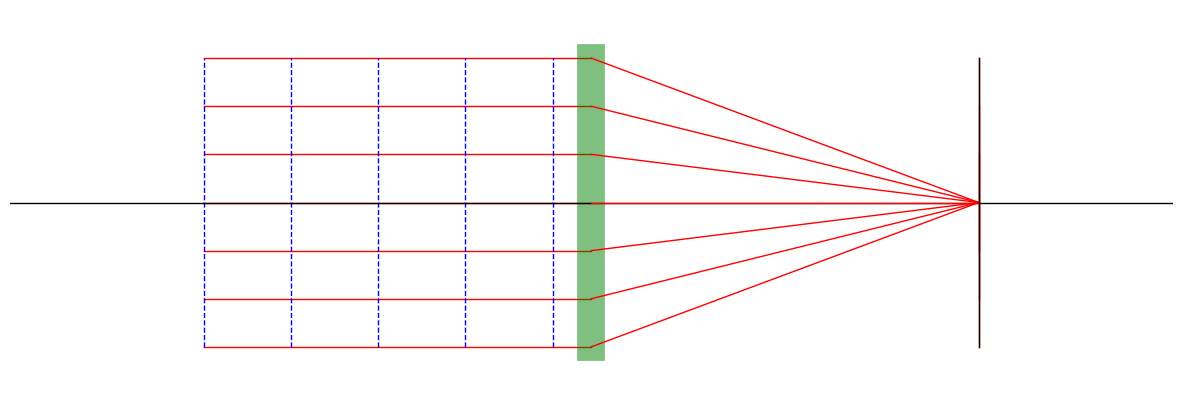

In [62]:
# Create a figure and axis
fig, ax = pp.subplots(figsize=(15, 5))


# Draw the wavefronts before the lens
for i in np.linspace(-3, 3, 7):
    ax.plot([-f, 0], [i, i], 'r', lw=1)

# Draw the lens
lens_x = [0, 0]
lens_y = [-3, 3]
ax.plot(lens_x, lens_y, 'g', linewidth=20, alpha=0.5)

# Draw vertical rays before the lens
for j in np.linspace(-10, -1, 5):
    ax.plot([j, j], [-3, 3], 'b--', lw=1)

# Draw the optical axis
ax.plot([-f-10, f + 10], [0, 0], 'k', lw=1)

# Draw the rays through the lens and stopping at the screen
for i in np.linspace(-3, 3, 7):
    ax.plot([0, f], [i, 0], 'r', lw=1)
    ax.plot([f, f], [0, i], 'r', lw=1)

# Draw the screen
ax.plot([f, f], [-3, 3], 'k', lw=1)

# Set axis limits
ax.set_xlim([-f - 5, f + 5])
ax.set_ylim([-4, 4])

# Hide the axes
ax.axis('off')

# Show the plot
pp.show()

## Analytische Lösung

In [63]:
x_analytical = np.linspace(-15,15,2**10)
y_analytical = j1(x_analytical) / x_analytical

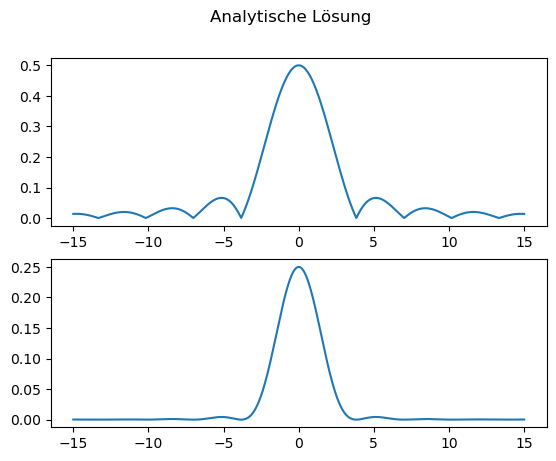

In [64]:
fig, axs = pp.subplots(2)
fig.suptitle('Analytische Lösung')
axs[0].plot(x_analytical, np.absolute(y_analytical))
axs[1].plot(x_analytical, y_analytical**2)
pp.show()

## Numerische Lösung

In [65]:
x_range = np.linspace(-h,h,N)
y_range = np.linspace(-h,h,N)


x, y = np.meshgrid(x_range, y_range)

### Filterfunktion 
Bereich für Integral

In [66]:
p_filter = np.where(x**2 + y**2 <= r**2,1,0)

In [67]:
s = x
t = y 

In [68]:
ds = (x_range[-1] - x_range[0]) / N 
dt = (y_range[-1] - y_range[0]) / N 

ds_dt = np.ones(x.shape) * ds * dt

In [69]:
def u(x_0,y_0,s,t):
    integrand=np.exp(-1j*k/f*(x_0*s+y_0*t))
    return np.sum(p_filter*integrand*ds_dt)

### Berechnung für den repräsentativen Bereich r_0

In [70]:
r_0 = 0.61*lmbda*f/r

samples = 2**6

g_range = np.linspace(-4*r_0, +4*r_0, samples)

u_x_0 = np.ones(samples,dtype=complex)

for x in range (0,samples):
    u_x_0[x] = u(g_range[x],0,s,t)/np.absolute(u(0,0,s,t))

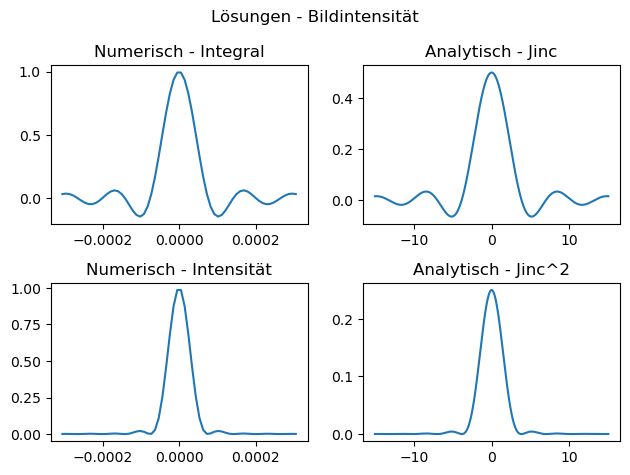

In [71]:
fig, axs = pp.subplots(2,2)
fig.suptitle('Lösungen - Bildintensität')
axs[0,0].plot(g_range,np.real(u_x_0))
axs[0,0].set_title('Numerisch - Integral')
axs[1,0].plot(g_range,u_x_0**2)
axs[1,0].set_title('Numerisch - Intensität')
axs[0,1].plot(x_analytical, y_analytical)
axs[0,1].set_title('Analytisch - Jinc')
axs[1,1].plot(x_analytical, y_analytical**2)
axs[1,1].set_title('Analytisch - Jinc^2')
fig.tight_layout()

## PSF quadratische Lösung

### Analytische Lösung

In [72]:
x_analytical = np.linspace(-15,15,2**10)
y_analytical = np.sinc((k*r)/f*x_analytical)**2*(np.sinc((k*r)/f))**2

### Numerische Lösung

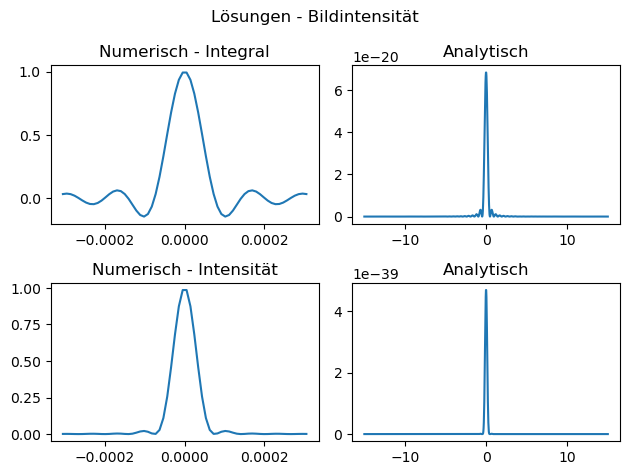

In [73]:
r_0 = 0.5*lmbda*f/r

p_filter = np.where((np.abs(x) <= r) & (np.abs(y) <= r), 1, 0)

fig, axs = pp.subplots(2,2)
fig.suptitle('Lösungen - Bildintensität')
axs[0,0].plot(g_range,np.real(u_x_0))
axs[0,0].set_title('Numerisch - Integral')
axs[1,0].plot(g_range,u_x_0**2)
axs[1,0].set_title('Numerisch - Intensität')
axs[0,1].plot(x_analytical, y_analytical)
axs[0,1].set_title('Analytisch')
axs[1,1].plot(x_analytical, y_analytical**2)
axs[1,1].set_title('Analytisch')
fig.tight_layout()


# Zweites Szenario

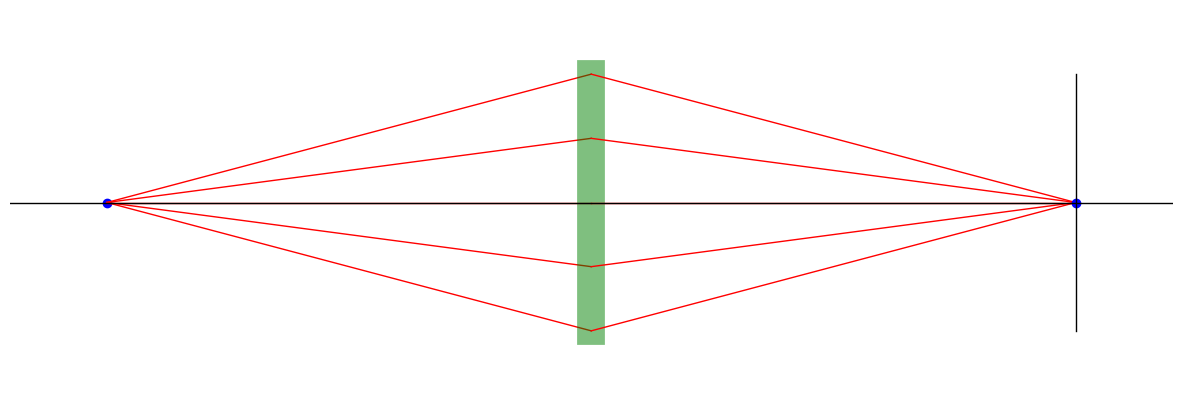

In [74]:
# Create a figure and axis
fig, ax = pp.subplots(figsize=(15, 5))

# Draw the point source at P0
ax.plot([-z0], [0], 'bo')  # Point source at P0

# Draw the rays originating from P0
for i in np.linspace(-2, 2, 5):
    ax.plot([-z0, 0], [0, i], 'r', lw=1)

# Draw the lens
lens_x = [0, 0]
lens_y = [-2, 2]
ax.plot(lens_x, lens_y, 'g', linewidth=20, alpha=0.5)


# Draw the rays converging to the point on the screen
for i in np.linspace(-2, 2, 5):
    ax.plot([0, z1], [i, 0], 'r', lw=1)

# Draw the screen at P2
ax.plot([z1], [0], 'bo')  # Point on the screen


# Draw the image plane at P2
ax.plot([z1, z1], [-2, 2], 'k', lw=1)

# Draw the optical axis
ax.plot([-z0-1, z1 + 1], [0, 0], 'k', lw=1)

# Add text labels


# Set axis limits
ax.set_xlim([-z0 - 1, z1 + 1])
ax.set_ylim([-3, 3])

# Hide the axes
ax.axis('off')

# Show the plot
pp.show()


### Analytische Lösung

### Numerische Lösung


In [88]:
r_0 = 0.61*lmbda*f/r
p_filter = np.where(x**2 + y**2 <= r**2,1,0)

def u(x_0, y_0,s,t):
    integrand = np.exp(1j * k/2 * (s**2 + t**2) * (1/z0 + 1/z1 - 1/f)) * np.exp(-1j * k/z1 * (x_0 * s + y_0 * t))
    return A0 / (lmbda**2 * z0 * z1) * np.exp(1j * k * (z0 + z1 + nDelta)) * np.exp(1j * k * (x_0**2 + y_0**2) / (2 * z1)) * np.sum(p_filter*integrand * ds_dt)


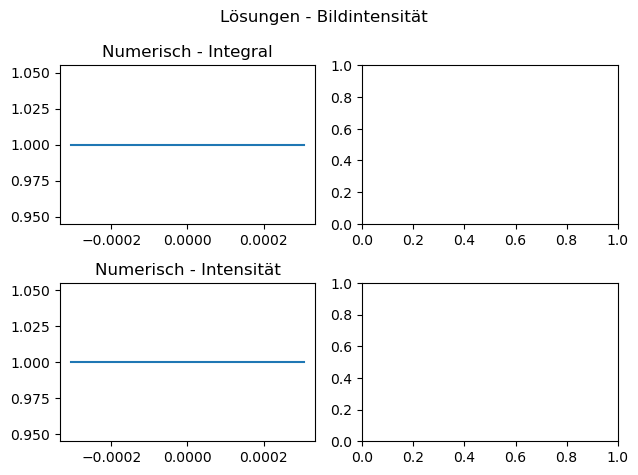

In [89]:
fig, axs = pp.subplots(2,2)
fig.suptitle('Lösungen - Bildintensität')
axs[0,0].plot(g_range,np.real(u_x_0))
axs[0,0].set_title('Numerisch - Integral')
axs[1,0].plot(g_range,u_x_0**2)
axs[1,0].set_title('Numerisch - Intensität')
fig.tight_layout()


# Szenrio 3: Fresnel-Beugung an einer Kante

## Analytische Lösung

In [77]:
x_analytical = np.linspace(-15,15,2**10)
# Berechnung der Fresnel-Integrale
b = np.linspace(0, 5, 100)
s, C = fresnel(b)



## Numerische Lösung 